In [ ]:
import pandas as pd

# Leemos el CSV
df = pd.read_csv('../data/dataset_estudiantes.csv')

# Mostrar las primeras filas
df.head()


,horas_estudio_semanal,nota_anterior,tasa_asistencia,horas_sueno,edad,nivel_dificultad,tiene_tutor,horario_estudio_preferido,estilo_aprendizaje,nota_final,aprobado
0,8.957476,48.830601,86.640182,6.675694,25,Fácil,Sí,Tarde,Lectura/Escritura,84.4,1
1,11.042524,80.825707,83.449655,4.616844,18,Difícil,No,Tarde,NaN,72.0,1
2,4.510776,90.383694,74.623607,7.755246,25,Fácil,No,Mañana,Lectura/Escritura,80.0,1
3,6.647213,81.878257,82.849841,8.592826,23,Fácil,No,NaN,Visual,78.2,1
4,1.000000,66.254179,54.539935,6.671840,21,Medio,No,NaN,Auditivo,66.0,1


In [ ]:
# Dimensiones del dataset
print(f"Files: {df.shape[0]}  |  Columnes: {df.shape[1]}")

# Información general
df.info()


Files: 1000  |  Columnes: 11
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   horas_estudio_semanal      1000 non-null   float64
 1   nota_anterior              1000 non-null   float64
 2   tasa_asistencia            1000 non-null   float64
 3   horas_sueno                850 non-null    float64
 4   edad                       1000 non-null   int64  
 5   nivel_dificultad           1000 non-null   object 
 6   tiene_tutor                1000 non-null   object 
 7   horario_estudio_preferido  900 non-null    object 
 8   estilo_aprendizaje         950 non-null    object 
 9   nota_final                 1000 non-null   float64
 10  aprobado                   1000 non-null   int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 86.1+ KB


In [3]:
# Creamos 'aprobado' si no existe (1 si nota_final >= 60, 0 en caso contrario)
if 'aprobado' not in df.columns and 'nota_final' in df.columns:
    df['aprobado'] = (df['nota_final'] >= 60).astype(int)

# Comprobamos distribución de la variable objetivo de clasificación
df['aprobado'].value_counts(normalize=True).rename('%').mul(100).round(2)


aprobado
1    89.8
0    10.2
Name: %, dtype: float64

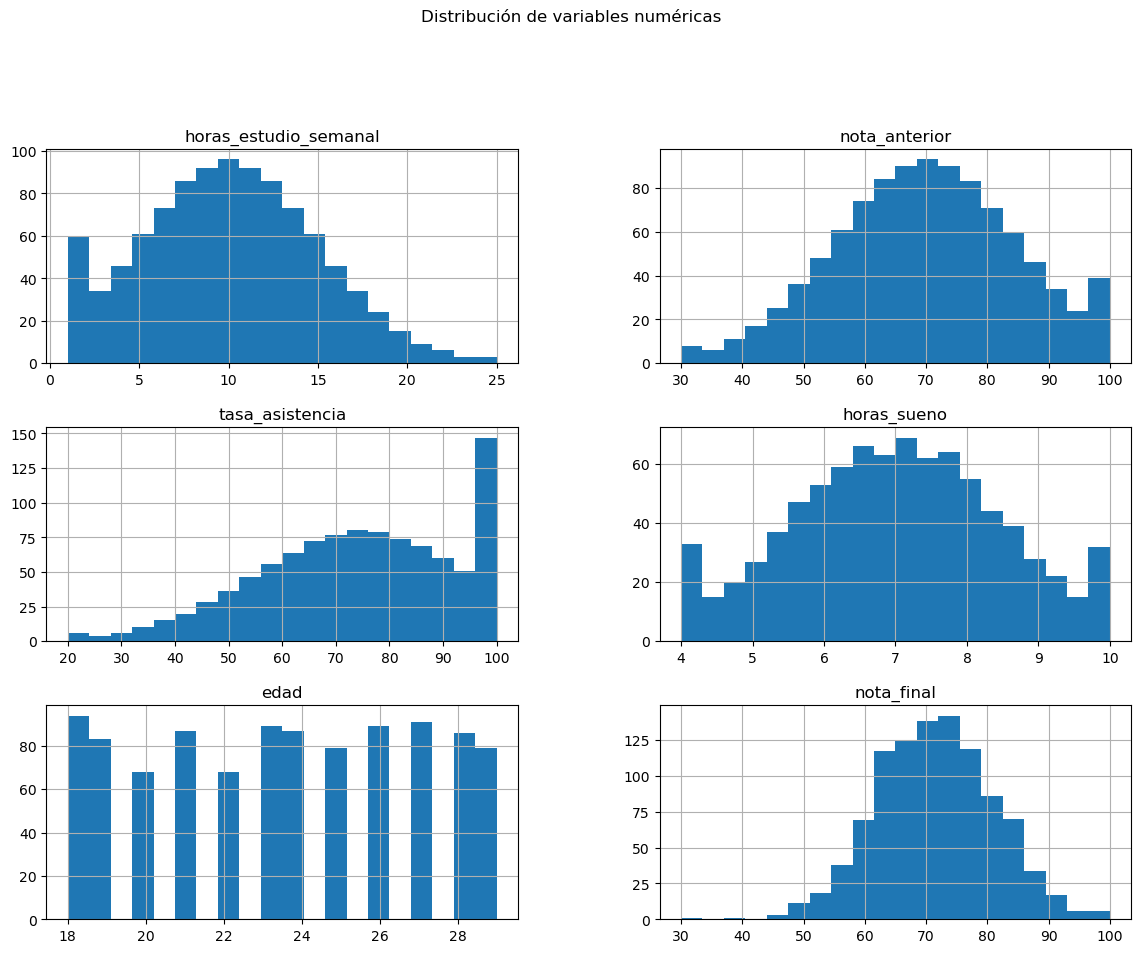

In [4]:
import matplotlib.pyplot as plt
import numpy as np

numericas = df.select_dtypes(include=[np.number]).columns.tolist()
# Quitamos la columna 'aprobado' si está en numéricas para no duplicar gráficos
numericas = [c for c in numericas if c != 'aprobado']

_ = df[numericas].hist(bins=20, figsize=(14, 10))
plt.suptitle("Distribución de variables numéricas", y=1.02)
plt.show()


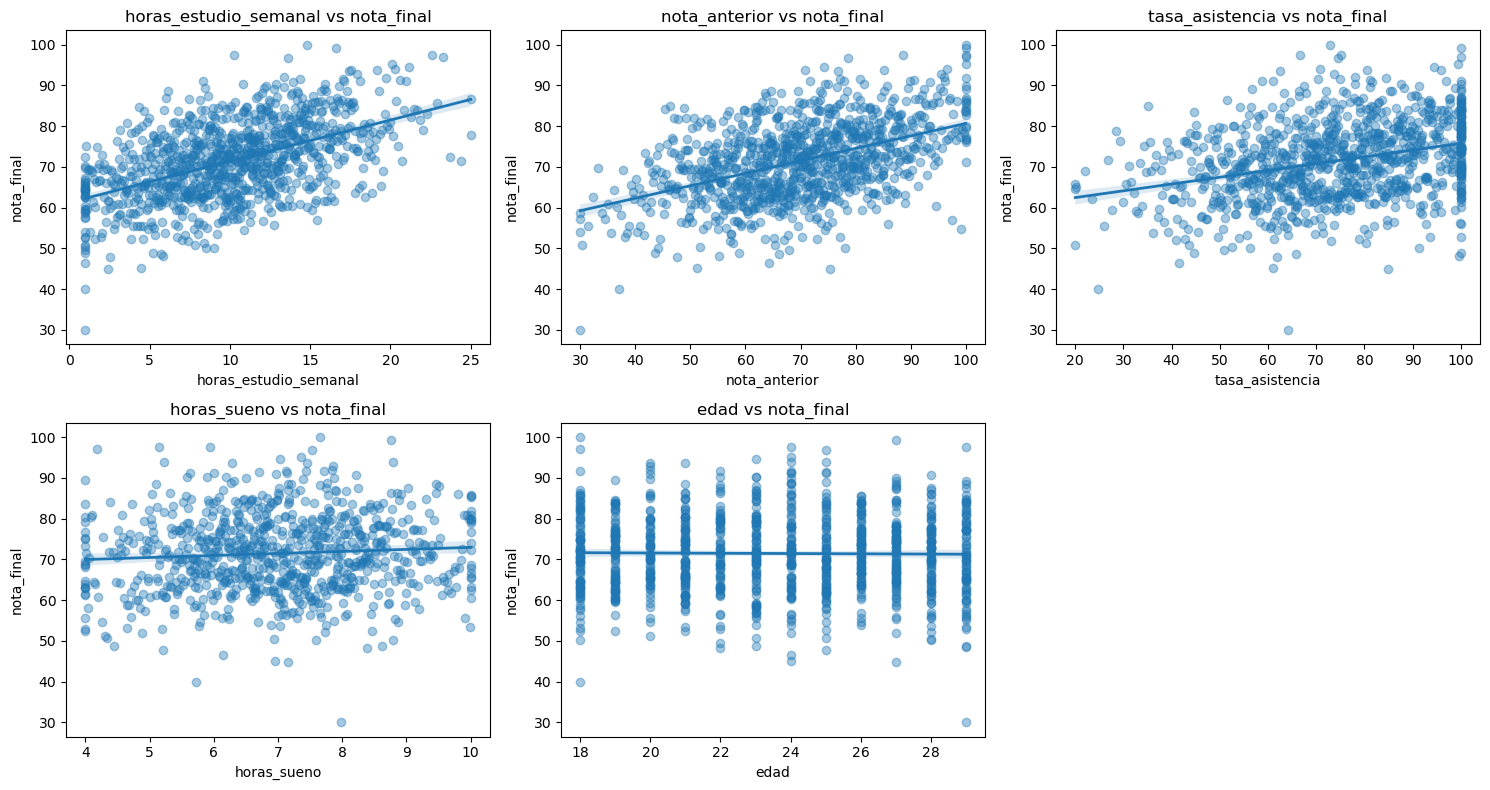

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

if 'nota_final' in df.columns:
    candidatos = [c for c in numericas if c != 'nota_final']
    n = len(candidatos)
    ncols = 3
    nrows = int(np.ceil(n / ncols)) if n > 0 else 1

    plt.figure(figsize=(15, 4*nrows))
    for i, col in enumerate(candidatos, 1):
        plt.subplot(nrows, ncols, i)
        sns.regplot(data=df, x=col, y='nota_final', scatter_kws={'alpha':0.4}, line_kws={'linewidth':2})
        plt.title(f"{col} vs nota_final")
    plt.tight_layout()
    plt.show()


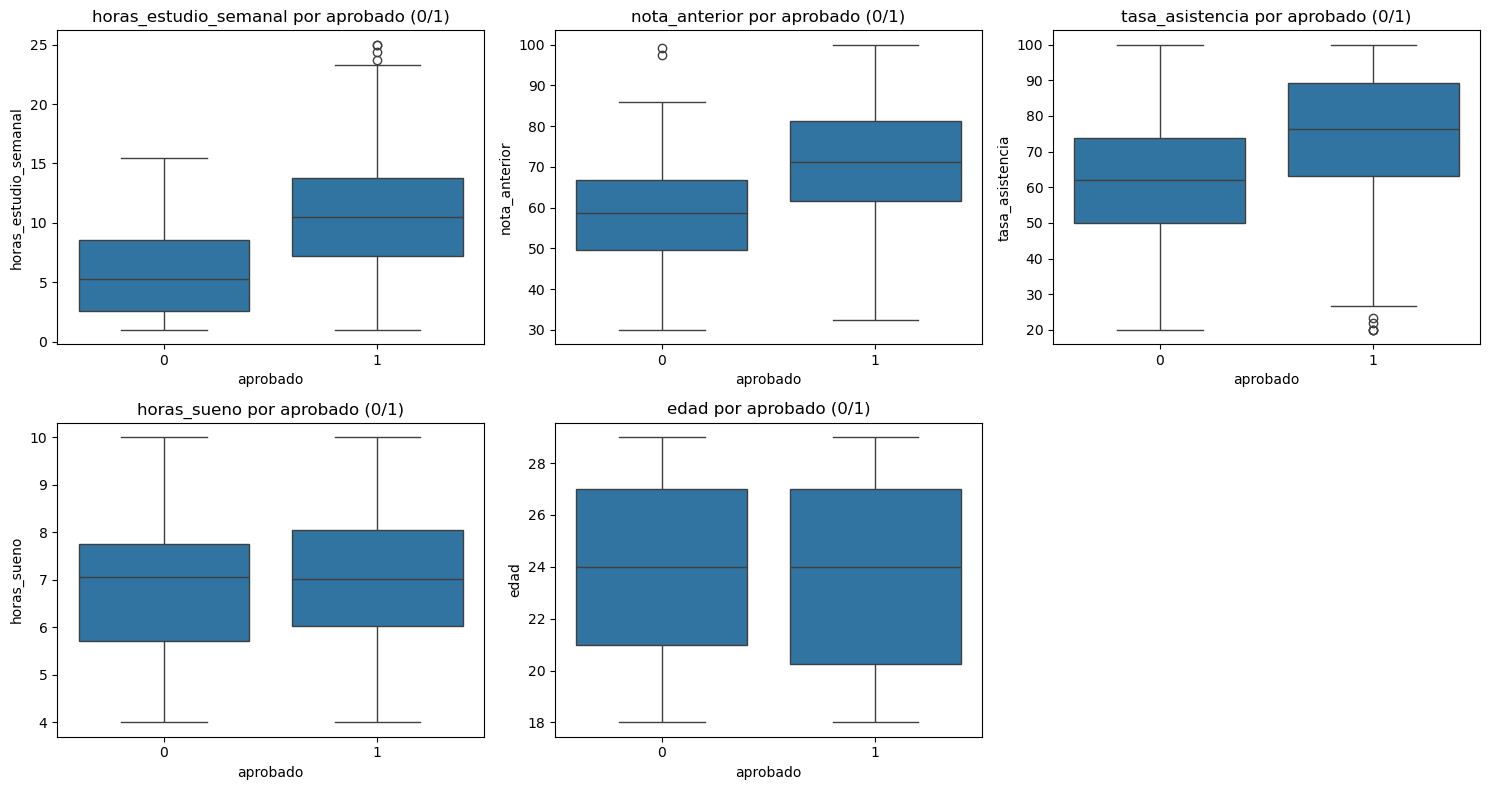

In [6]:
if 'aprobado' in df.columns:
    top_vars = [c for c in numericas if c != 'nota_final'][:6]  # primeras 6 por simplicidad
    n = len(top_vars)
    ncols = 3
    nrows = int(np.ceil(n / ncols)) if n > 0 else 1

    plt.figure(figsize=(15, 4*nrows))
    for i, col in enumerate(top_vars, 1):
        plt.subplot(nrows, ncols, i)
        sns.boxplot(data=df, x='aprobado', y=col)
        plt.title(f"{col} por aprobado (0/1)")
    plt.tight_layout()
    plt.show()


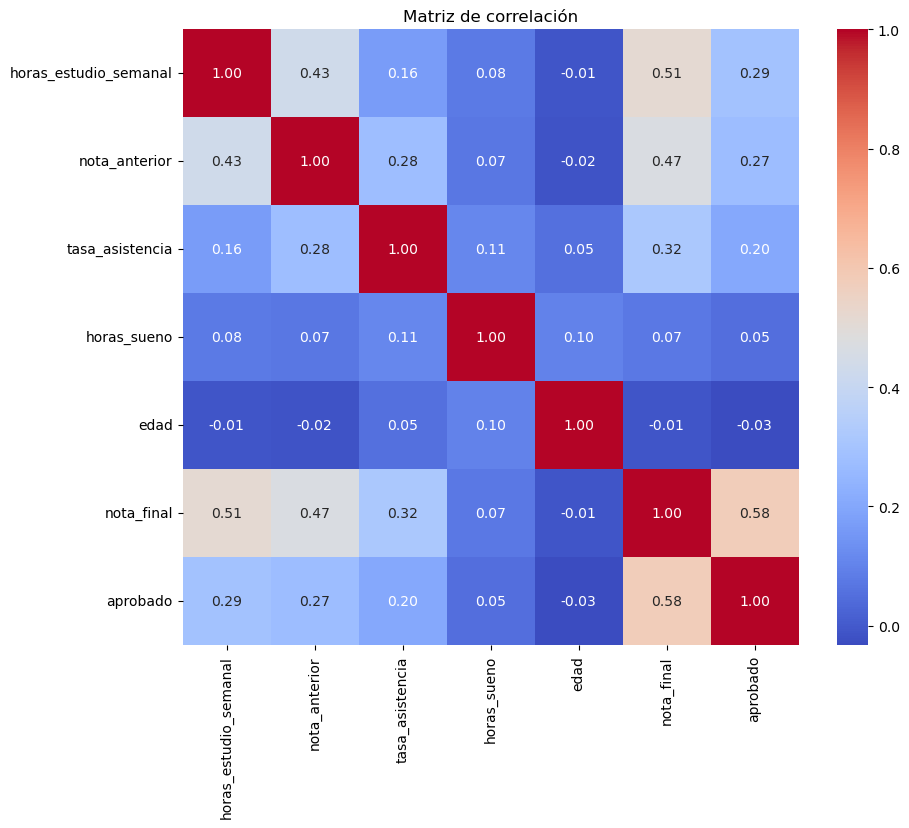

In [7]:
corr = df[numericas + (['aprobado'] if 'aprobado' in df.columns else [])].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Matriz de correlación")
plt.show()


In [8]:
categoricas = df.select_dtypes(include='object').columns.tolist()
resumen_cat = (
    df[categoricas]
    .nunique()
    .sort_values(ascending=False)
    .rename("cardinalidad")
    .to_frame()
)
resumen_cat


,cardinalidad
estilo_aprendizaje,4
nivel_dificultad,3
horario_estudio_preferido,3
tiene_tutor,2


In [9]:
for col in categoricas[:5]:  # mostramos hasta 5 para no saturar
    print(f"\n==== {col} ====")
    display(df[col].value_counts(dropna=False).head(10))



==== nivel_dificultad ====


nivel_dificultad
Medio      504
Fácil      313
Difícil    183
Name: count, dtype: int64


==== tiene_tutor ====


tiene_tutor
No    597
Sí    403
Name: count, dtype: int64


==== horario_estudio_preferido ====


horario_estudio_preferido
Noche     344
Tarde     337
Mañana    219
NaN       100
Name: count, dtype: int64


==== estilo_aprendizaje ====


estilo_aprendizaje
Visual               363
Auditivo             254
Kinestésico          178
Lectura/Escritura    155
NaN                   50
Name: count, dtype: int64

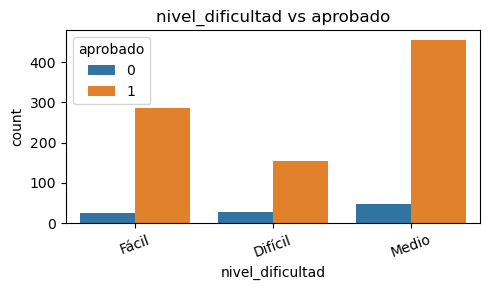

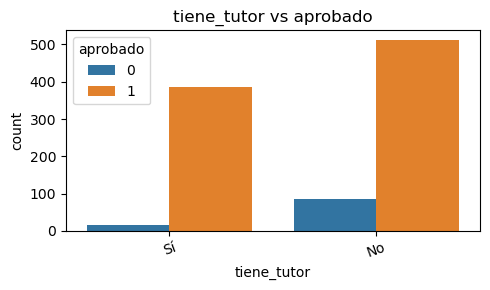

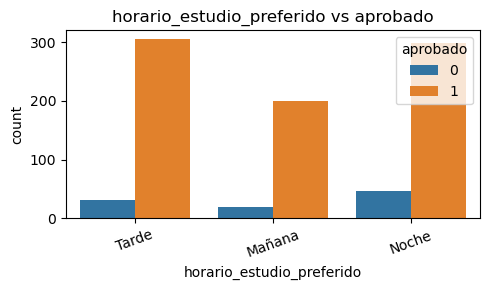

In [10]:
if 'aprobado' in df.columns and len(categoricas) > 0:
    for col in categoricas[:3]:
        plt.figure(figsize=(5,3))
        sns.countplot(data=df, x=col, hue='aprobado')
        plt.title(f"{col} vs aprobado")
        plt.xticks(rotation=20)
        plt.tight_layout()
        plt.show()


## ✅ Conclusiones del Análisis Exploratorio (EDA)

- La variable objetivo de clasificación `aprobado` está equilibrada: aproximadamente un **60%** de aprobados (nota_final ≥ 60) y un **40%** de suspensos. Esto permite aplicar modelos de clasificación sin técnicas adicionales de balanceo.
  
- Las variables **`nota_anterior`**, **`horas_estudio_semanal`** y **`tasa_asistencia`** muestran una **correlación positiva clara con `nota_final`**, siendo buenos candidatos para los modelos de regresión y clasificación.

- La variable **`edad`** tiene una correlación débil, pero se mantendrá por si contribuye de forma no lineal o interactúa con otras.

- No se detectan valores nulos en el dataset, lo cual facilita el preprocesamiento sin necesidad de imputación.

- Las variables categóricas presentes son:
  - `nivel_dificultad` (3 categorías)
  - `tiene_tutor` (2 categorías: sí/no)
  - `horario_estudio_preferido` (3 categorías)
  - `estilo_aprendizaje` (4 categorías)

  Todas ellas tienen **cardinalidad baja**, por lo que son aptas para codificación One-Hot sin riesgo de explosión dimensional.

- El análisis de correlación no muestra multicolinealidad grave entre variables numéricas.

- Los histogramas y boxplots muestran que:
  - Los alumnos aprobados tienen en media **mayores horas de estudio semanal**, **mejor nota anterior** y **mejor asistencia**.
  - La variable `horas_sueno` no parece tener un impacto relevante.

➡️ El dataset está listo para el preprocesamiento: codificación de categóricas, normalización de numéricas y división en conjuntos de entrenamiento y prueba.
